### ***Random Sample Imputation***

random Sample imputation consists of taking random observation from the dataset and we use this observation to replace the NAN values.


### When it should be used ?

It assumes that the data are missing completely at random(MCAR).



In [2]:
import pandas as pd
df = pd.read_csv('/content/titanic.csv' , usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df.shape

(891, 3)

In [5]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
df['Age'].dropna() #drop all the NAN values

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [7]:
df.shape

(891, 3)

In [12]:
df['Age'].isnull().sum()

177

In [11]:
df['Age'].dropna().sample()

#everytime you run this , it will give different value

784    25.0
Name: Age, dtype: float64

In [13]:
df['Age'].dropna().sample(df['Age'].isnull().sum())

#this is replacing all the NAN values with some sample values

788     1.0
571    53.0
640    20.0
875    15.0
452    30.0
       ... 
361    29.0
58      5.0
74     32.0
108    38.0
85     33.0
Name: Age, Length: 177, dtype: float64

In [14]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

The purpose of this line of code is to randomly select a sample of non-missing Age values from the DataFrame, with the sample size being equal to the number of missing values in the Age column. This can be useful in scenarios where you need to replace missing values with a random selection of existing non-missing values.

In [15]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [16]:
median = df.Age.median()
median

28.0

In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

    df[variable+"_random"]=df[variable]

    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)

    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index

    df.loc[df[variable].isnull(),variable+'_random']=random_sample

**random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)**


.dropna(): Removes all missing values from the variable column.

.sample(n, random_state=0): Randomly samples n non-missing values, where n is the number of missing values in the variable column. The random_state=0 ensures reproducibility.



**random_sample.index = df[df[variable].isnull()].index**

This aligns the indices of the random_sample with the indices of the missing values in the original variable column. This is necessary for correctly placing the sampled values into the DataFrame.

**df.loc[df[variable].isnull(), variable+'_random'] = random_sample**

This line assigns the randomly sampled values to the positions of the missing values in the new variable_random column.

In [20]:

impute_nan(df,"Age",median)

In [21]:

df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

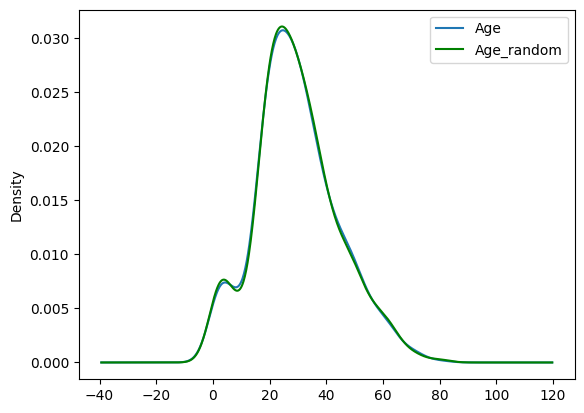

In [26]:

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)

df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

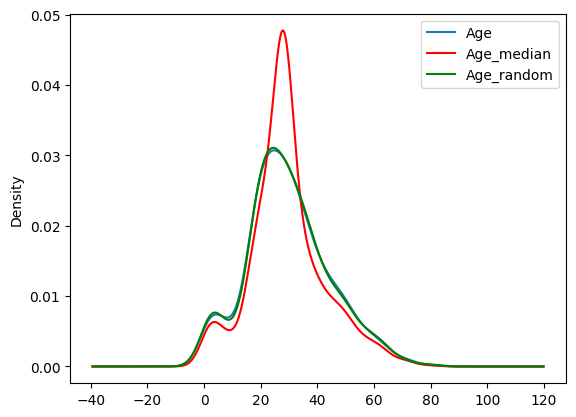

In [27]:

fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


**Advantages**:

1. Easy To implement
2. There is less distortion in variance

**Disadvantage**
:
1. Every situation randomness wont work

### ***Capturing NAN values with a new feature***

It works well if the data are not missing completely at random(MCAR)

In [28]:
df_new = pd.read_csv('/content/titanic.csv' , usecols=['Age','Fare','Survived'])

In [29]:
df_new.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
import numpy as np

In [31]:
df_new['Age_NAN'] = np.where(df_new['Age'].isnull(),1,0)

This line of code creates a new column named Age_NAN in the DataFrame df_new. The purpose of this new column is to indicate whether the corresponding value in the Age column is missing (NaN).

The Age_NAN column shows 1 where the Age column has missing values (NaN), and 0 where the Age column has non-missing values. This helps to easily identify and work with rows that have missing values in the Age column.

In [32]:
df_new.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [33]:
df_new.Age.mean()

29.69911764705882

In [34]:
df_new.Age.median()

28.0

In [35]:
df_new['Age'].fillna(df_new.Age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [36]:
df_new['Age'].fillna(df_new.Age.median(), inplace = True)

#to change permantely we use inplace = true

In [37]:
df_new.head(24)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


####Advantages:

1. Easy to implement
2. Captures the importance of missing values

####Disadvantages:

1. Creating Additional Features(Curse of Dimensionality)

### ***END OF DISTRIBUTION IMPUTATION***



In [38]:
df_end=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df_end.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

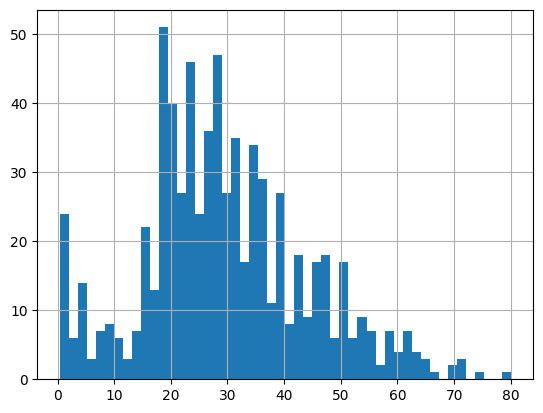

In [39]:
df_end.Age.hist(bins=50)

In [40]:
df_end.Age.mean()

29.69911764705882

In [42]:
df_end.Age.mean()+3*df_end.Age.std()

73.27860964406094

In [45]:
import seaborn as sns


In [46]:
sns.boxplot('Age',data=df_end)

TypeError: boxplot() got multiple values for argument 'data'

<Axes: xlabel='Age'>

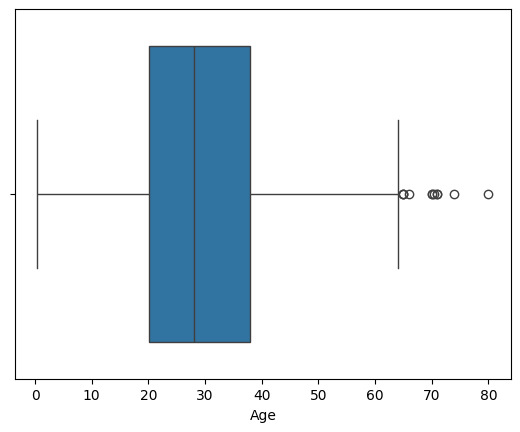

In [47]:
import seaborn as sns

sns.boxplot(x='Age', data=df_end)

In [48]:
extreme = df_end.Age.mean()+3*df_end.Age.std()

In [49]:
def impute_nan(df,variable,median,extreme)  :
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

from seaborn boxplot we can see the right side outliers , that's why we take the right 3rd standard deviation after the mean value.

In [50]:
impute_nan(df_end , 'Age', df.Age.median(), extreme)

In [51]:
df_end.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


The Age column's missing values are filled with the median value.

The Age_end_distribution column's missing values are filled with the calculated extreme value

<Axes: >

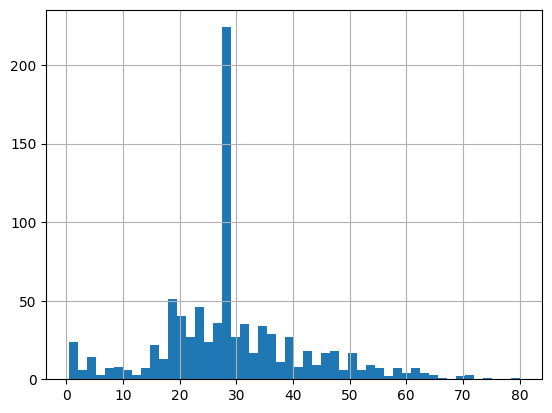

In [53]:
df_end['Age'].hist(bins=50)

<Axes: >

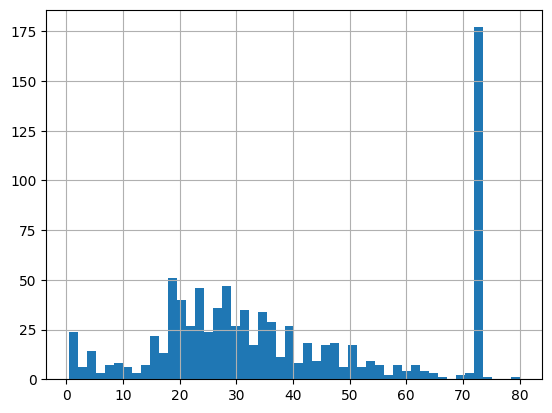

In [54]:
df_end['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

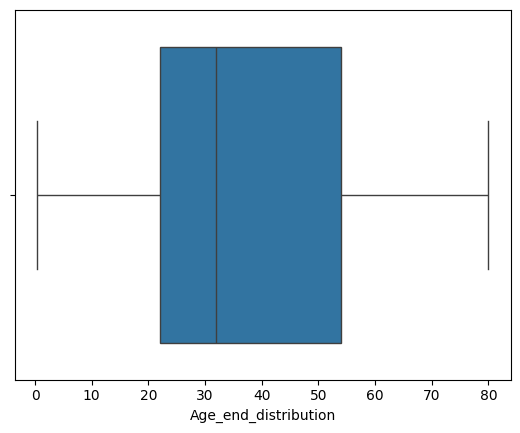

In [56]:
sns.boxplot( x = 'Age_end_distribution',data=df_end)

Now there is no outliers.